# Challenge - Time Series Analysis

Using a different time series data set (either from FRED or elsewhere, go about the process of time series modeling. Specifically generate the following things:

Plot the time series, along with any logical or necessary differences to get a stationary dataset
Generate and interpret a PACF for the time series (and/or its differences)
Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
Finally choose one specification and make the case for that as a logical model for your dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [2]:
unemployment = pd.read_csv('UNRATE.csv')

In [4]:
unemployment.tail()

,DATE,UNRATE
850,2018-11-01,3.7
851,2018-12-01,3.9
852,2019-01-01,4.0
853,2019-02-01,3.8
854,2019-03-01,3.8


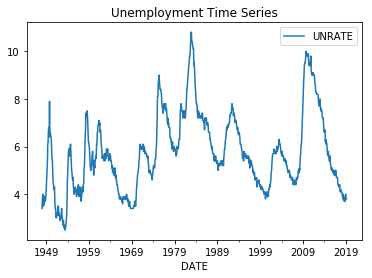

In [5]:
unemployment.index = pd.to_datetime(unemployment.DATE)
unemployment.plot()
plt.title('Unemployment Time Series')
plt.show()

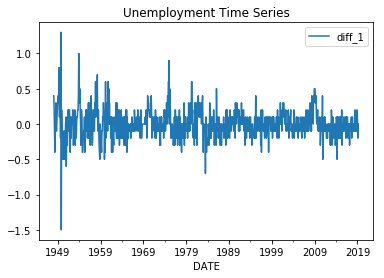

In [8]:
unemployment['diff_1'] = unemployment.UNRATE - unemployment.UNRATE.shift()
unemployment.plot(y='diff_1')
plt.title('Unemployment Time Series')
plt.show()

In [9]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(center=False,window=12).mean()
    rolstd = timeseries.rolling(center=False,window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

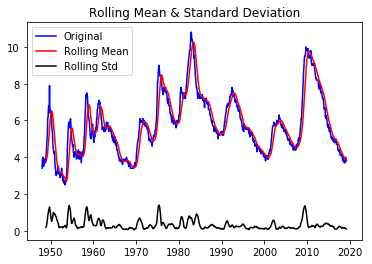

Results of Dickey-Fuller Test:
Test Statistic                  -3.007893
p-value                          0.034164
#Lags Used                      12.000000
Number of Observations Used    842.000000
Critical Value (1%)             -3.438140
Critical Value (5%)             -2.864979
Critical Value (10%)            -2.568601
dtype: float64


In [10]:
test_stationarity(unemployment.UNRATE)

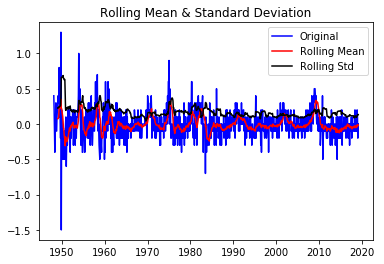

Results of Dickey-Fuller Test:
Test Statistic                -8.663250e+00
p-value                        4.759355e-14
#Lags Used                     1.100000e+01
Number of Observations Used    8.420000e+02
Critical Value (1%)           -3.438140e+00
Critical Value (5%)           -2.864979e+00
Critical Value (10%)          -2.568601e+00
dtype: float64


In [11]:
test_stationarity(unemployment.diff_1[1:])

In [12]:
model110 = ARIMA(unemployment.diff_1[1:], order=(1,1,0))
model_fit_110 = model110.fit()
print(model_fit_110.summary())
print('Residuals Description')
print(model_fit_110.resid.describe())

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  853
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  69.928
Method:                       css-mle   S.D. of innovations              0.223
Date:                Sun, 07 Apr 2019   AIC                           -133.857
Time:                        17:36:35   BIC                           -119.611
Sample:                    03-01-1948   HQIC                          -128.401
                         - 03-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0005      0.005     -0.098      0.922      -0.010       0.009
ar.L1.D.diff_1    -0.5939      0.028    -21.581      0.000      -0.648      -0.540
                                    

In [13]:
model111 = ARIMA(unemployment.diff_1[1:], order=(1,1,1))
model_fit_111 = model111.fit()
print(model_fit_111.summary())
print('Residuals Description')
print(model_fit_111.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  853
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 156.486
Method:                       css-mle   S.D. of innovations              0.201
Date:                Sun, 07 Apr 2019   AIC                           -304.971
Time:                        17:36:46   BIC                           -285.976
Sample:                    03-01-1948   HQIC                          -297.697
                         - 03-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0001      0.002     -0.087      0.931      -0.003       0.003
ar.L1.D.diff_1    -0.2243      0.045     -5.022      0.000      -0.312      -0.137
ma.L1.D.diff_1    -0.6986      0.036

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [14]:
model_011 = ARIMA(unemployment.diff_1[1:], order=(0,1,1))
model_fit_011 = model_011.fit()
print(model_fit_011.summary())
print('Residuals Description')
print(model_fit_011.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  853
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 145.412
Method:                       css-mle   S.D. of innovations              0.204
Date:                Sun, 07 Apr 2019   AIC                           -284.823
Time:                        17:36:56   BIC                           -270.577
Sample:                    03-01-1948   HQIC                          -279.367
                         - 03-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0001      0.001     -0.112      0.911      -0.003       0.002
ma.L1.D.diff_1    -0.8201      0.024    -34.046      0.000      -0.867      -0.773
                                    

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [15]:
model_210 = ARIMA(unemployment.diff_1[1:], order=(2,1,0))
model_fit_210 = model_210.fit()
print(model_fit_210.summary())
print('Residuals Description')
print(model_fit_210.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  853
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 122.428
Method:                       css-mle   S.D. of innovations              0.210
Date:                Sun, 07 Apr 2019   AIC                           -236.855
Time:                        17:37:06   BIC                           -217.860
Sample:                    03-01-1948   HQIC                          -229.580
                         - 03-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0004      0.003     -0.106      0.915      -0.007       0.006
ar.L1.D.diff_1    -0.7969      0.032    -24.731      0.000      -0.860      -0.734
ar.L2.D.diff_1    -0.3409      0.032

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
